<a href="https://colab.research.google.com/github/CameronBannick/Sales_Predictions/blob/main/project_2_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import data
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Week 7/Data Proposals/nuforc_reports.csv')
df.head()

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaN,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaN,NaN,NaN
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18T00:00:00,NaN,NaN


In [ ]:
#seeing info on all data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   summary         88095 non-null  object 
 1   city            87891 non-null  object 
 2   state           82890 non-null  object 
 3   date_time       86938 non-null  object 
 4   shape           85627 non-null  object 
 5   duration        84954 non-null  object 
 6   stats           88088 non-null  object 
 7   report_link     88125 non-null  object 
 8   text            88070 non-null  object 
 9   posted          86938 non-null  object 
 10  city_latitude   72013 non-null  float64
 11  city_longitude  72013 non-null  float64
dtypes: float64(2), object(10)
memory usage: 8.1+ MB


In [ ]:
#check for duplicates
df.duplicated().sum()

0

In [ ]:
#removing unneccesary columns
df = df.drop(columns=['summary', 'duration', 'stats', 'report_link', 'text', 'posted', 'city'])
df.head()

,state,date_time,shape,city_latitude,city_longitude
0,VA,2019-12-12T18:43:00,light,37.343152,-77.408582
1,CT,2019-03-22T18:30:00,circle,41.664800,-72.639300
2,NaN,NaN,NaN,NaN,NaN
3,ON,2019-04-17T02:00:00,teardrop,45.381383,-75.708501
4,NY,2009-03-15T18:00:00,cigar,NaN,NaN


In [ ]:
#checking values for categories
df['shape'].value_counts()

light        18230
circle       10130
triangle      7910
fireball      7095
unknown       6182
sphere        6065
other         5749
disk          4522
oval          3857
formation     2842
changing      2112
cigar         1990
flash         1675
rectangle     1597
cylinder      1374
diamond       1273
chevron        953
teardrop       767
egg            666
cone           349
cross          289
Name: shape, dtype: int64

In [ ]:
df['state'].value_counts()

CA    9506
FL    5294
WA    3856
TX    3481
NY    3425
      ... 
YT      17
PE      13
NT      10
PR       2
QB       1
Name: state, Length: 65, dtype: int64

In [ ]:
#making sure datatypes match
df.dtypes

state              object
date_time          object
shape              object
city_latitude     float64
city_longitude    float64
dtype: object

In [ ]:
#missing values counts
df.isna().sum()

state              5235
date_time          1187
shape              2498
city_latitude     16112
city_longitude    16112
dtype: int64

Text(0, 0.5, 'Amount of Sightings')

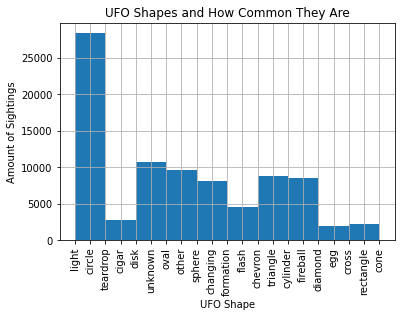

In [ ]:
#visuals for each column
df['shape'].hist()
plt.xticks(rotation = 90)
plt.title('UFO Shapes and How Common They Are')
plt.xlabel('UFO Shape')
plt.ylabel('Amount of Sightings')




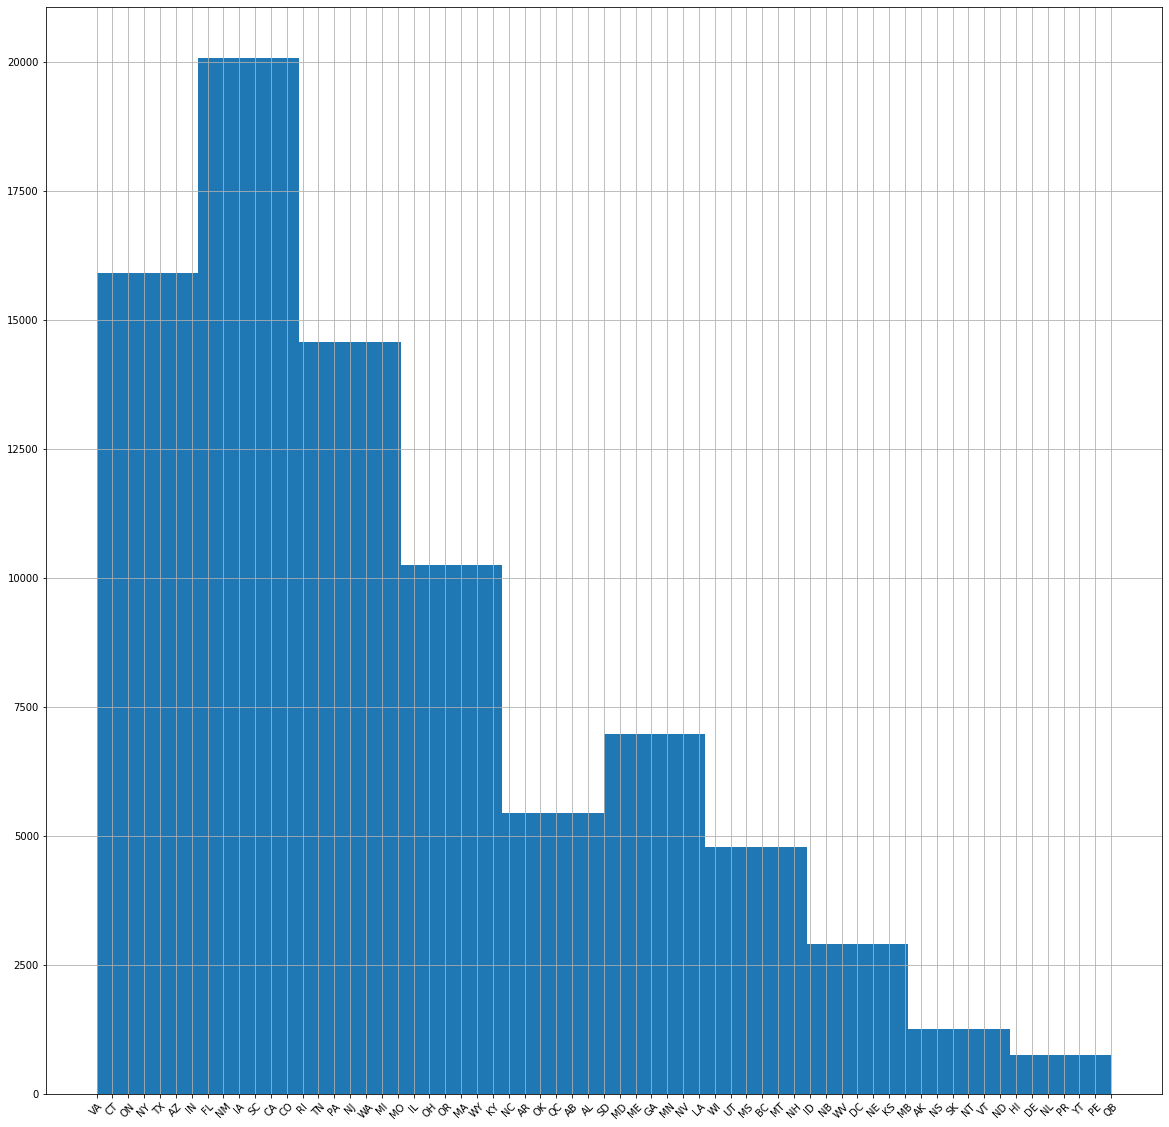

In [ ]:
df['state'].hist(figsize=(20,20))
plt.xticks(rotation = 45)
plt.show()
